In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams) # Updates the parametere set above. 

#RK4 metode kopiert fra tidligere numerisk øving

def equation(t, vals): 
    """
    Calculates the RHS of the differential equations given an array (vals) which contains the parameters

    Parameters
    -----------
    t: (float) time
    vals: (array) values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    
    theta, omega = vals
    dtheta = omega
    domega = -q * omega - (g/l) * theta + drivkraft * np.sin(omega_D*t) #Endringer her siden det er flere variabler
    return np.array([dtheta, domega])

def RK4_step(RHS, vals, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (numpy array) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """
    k1 = RHS(t, vals)   
    k2 = RHS(t+dt/2, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, vals+(dt/2)*k2)
    k4 = RHS(t+dt, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(RHS, theta_0, theta_dot_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(RHS, np.array([theta[i], w[i]]), t[i], dt) 
        # Calculates values of theta and omega using RK4-method
        
    return theta, w, t

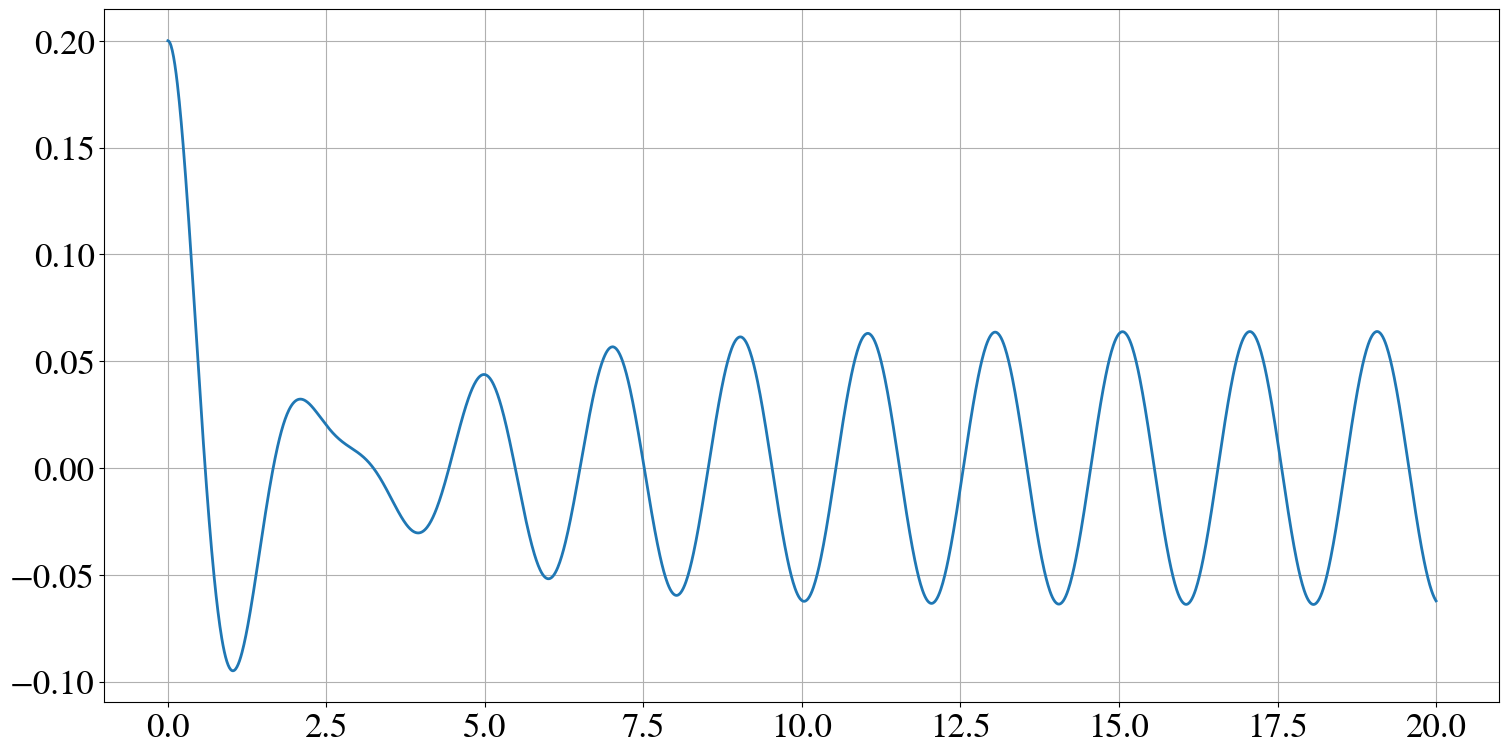

In [ ]:
l = 1 # m - Lengden av snora
g = 9.8 #m/s^2 - Tyngdeakselerasjon
theta_0 = 0.2 #rad - Initial vinkel med hensyn til vertikalen
theta_dot_0 = 0.0 #rad/s - Initial vinkelhastighet 
q = 1.0 #Hz - Friksjonsparameter
omega_D = 3.13 #rad/s - Drivkraftens vinkelfrekvens
drivkraft = 0.2 #s^-2 - Drivkraft


theta_R, w_r, t = RK4_method(equation, theta_0, theta_dot_0, dt=0.01, T=20)

plt.plot(t, theta_R)
plt.grid()
plt.show()
  
